In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = '/content/drive/MyDrive/개인 연구/강의 수강/(패스트 캠퍼스) 데이터 분석/Ch5 Decision Tree/galaxy.csv'
data = pd.read_csv(data_path)

In [3]:
data.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,None,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,None,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,None,Space Gray,Galaxy_S8,contains description,0,0,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               1179 non-null   object 
 3   color                 892 non-null    object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [6]:
data = data.fillna('Unknown')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               1485 non-null   object 
 3   color                 1485 non-null   object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [8]:
# Black 색깔 통합
def black(x):
    if x in ['Midnight Black','Aura Black','Prism Black']:        
        return 'Black'
    else:
        return x 
data['color'] = data['color'].apply(lambda x: black(x))

In [9]:
data = pd.get_dummies(data, columns =['carrier', 'color', 'productline', 'noDescription'])

In [10]:
X = data.drop('sold', axis=1)
y = data['sold']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=10)

In [19]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [20]:
pred = dt_model.predict(X_test)

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82       161
           1       0.80      0.74      0.77       136

    accuracy                           0.79       297
   macro avg       0.79      0.79      0.79       297
weighted avg       0.79      0.79      0.79       297



In [23]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(y_test, pred)

In [24]:
auc(fpr, tpr)

0.7905781877968578

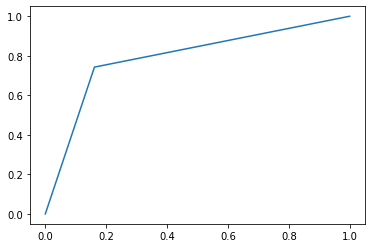

In [25]:
plt.plot(fpr, tpr)

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=10, random_state=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [39]:
rf_pred = rf_model.predict(X_test)

In [40]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       161
           1       0.85      0.78      0.81       136

    accuracy                           0.84       297
   macro avg       0.84      0.83      0.83       297
weighted avg       0.84      0.84      0.83       297



In [41]:
fpr, tpr, threshold = roc_curve(y_test, rf_pred)

In [42]:
auc(fpr, tpr)

0.8306996711728168

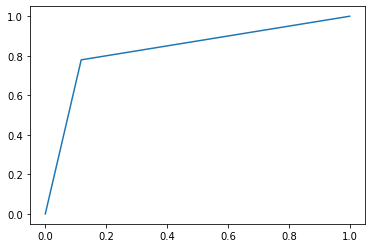

In [43]:
plt.plot(fpr,tpr)